<a href="https://colab.research.google.com/github/nngiabao/MLPractice/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#MNISTDigit Recognition
#CNN Deep Learning
#Link: https://www.kaggle.com/code/ibrahimqasimi/mnist-digit-recognition-cnn-deep-learning

In [18]:
# Data handling and numerical computations
import numpy as np

# Load MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

# Deep learning framework (TensorFlow & Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report
colors = ["#280536", "#d10d6f"]

In [5]:
#spliting into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#Display dataset shapes
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [6]:
#verify
unique_classes = np.unique(y_train)
print("Unique labels:", unique_classes)
print("Number of classes:", len(unique_classes))

Unique labels: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


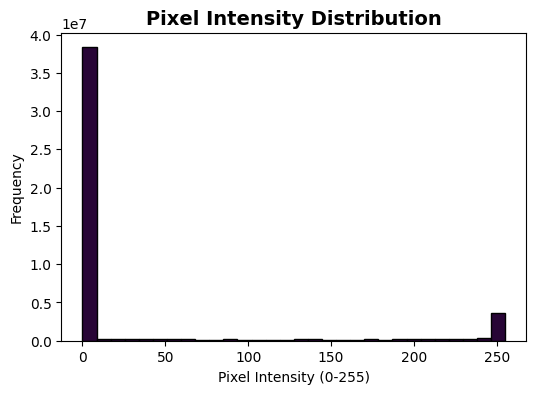

In [8]:
#pixel intensity
plt.figure(figsize=(6,4))
plt.hist(X_train.reshape(-1), bins=30, color="#280536", edgecolor="black")
plt.title("Pixel Intensity Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.show()

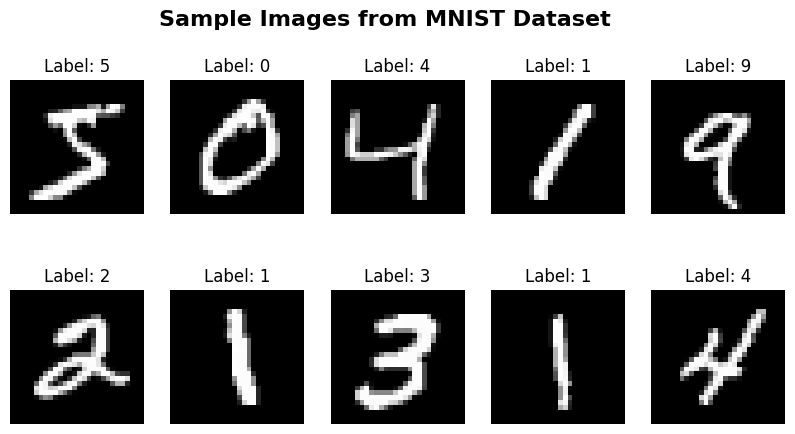

In [19]:
#sample images
plt.figure(figsize=(10, 5))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16, fontweight='bold')
plt.show()

/tmp/ipython-input-3329045562.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette=colors)
/tmp/ipython-input-3329045562.py:4: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=y_train, palette=colors)


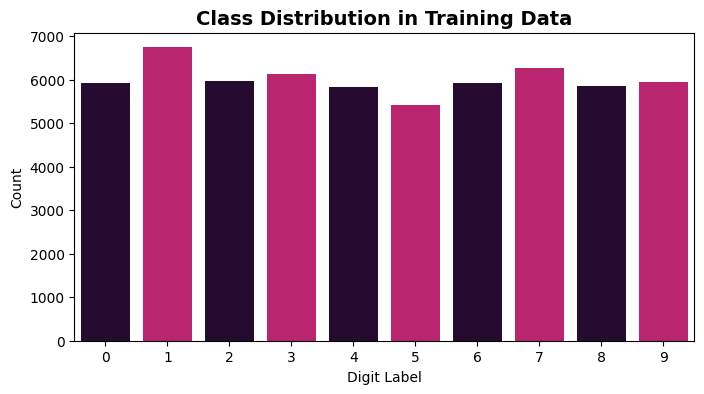

In [20]:
#dataset shape
plt.figure(figsize=(8,4))
# Define a color palette
sns.countplot(x=y_train, palette=colors)
plt.title("Class Distribution in Training Data", fontsize=14, fontweight='bold')
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.show()

In [21]:
#normalize pixel values
# Convert pixel values from integers (0-255) to floats (0-1)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

print("After normalization:")
print("Training data min:", X_train.min(), "max:", X_train.max())
print("Testing data min:", X_test.min(), "max:", X_test.max())

After normalization:
Training data min: 0.0 max: 1.0
Testing data min: 0.0 max: 1.0


In [ ]:
#Reshape image
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))
#
print('Trainning data shape:', X_train.shape)
print('Testing data shape:', X_test.shape)

In [ ]:
#

In [22]:
#Model Building CNN
#Architecture
#1. Conv2D Layer + ReLU Activition -> extract img features
#2. MaxPooling2D -> downsample feature maps
#3. Dropout -> prevent overfitting
#4. Flatten -> convert 2D feeatures into 1D
#5. Dense Layers -> fully connected layers for classification
#6. Output Layer (Dense + softmax)
#Define the CNN
model = models.Sequential([
    #First conv + pool block
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    #Second conv + pool block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    #Flatten + dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    #Output Layer (10 classes for digits 0-9)
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
#print model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#compile the CNN model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
#Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
#check what metrics
print("History keys: ",history.history.keys())

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.8204 - loss: 0.5511 - val_accuracy: 0.9823 - val_loss: 0.0606
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9665 - loss: 0.1133 - val_accuracy: 0.9846 - val_loss: 0.0511
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9746 - loss: 0.0859 - val_accuracy: 0.9881 - val_loss: 0.0422
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9782 - loss: 0.0699 - val_accuracy: 0.9896 - val_loss: 0.0354
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 32ms/step - accuracy: 0.9821 - loss: 0.0601 - val_accuracy: 0.9914 - val_loss: 0.0314
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9833 - loss: 0.0561 - val_accuracy: 0.9912 - val_loss: 0.0346
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9843 - loss: 0.0505 - val_accuracy: 0.9909 - val_loss: 0.0327
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9860 -

In [28]:
#Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')
#

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9895 - loss: 0.0339
Test accuracy: 0.9910
Test loss: 0.0273


In [29]:

#Get predictions
y_pred_probs = model(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
#

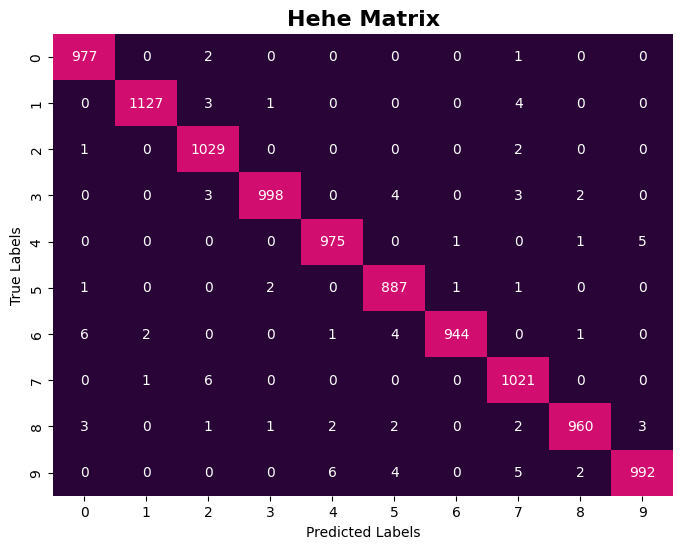

In [30]:
#Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap=colors, cbar=False)
plt.title('Hehe Matrix' , fontsize=16, fontweight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [31]:
#Generate classfication report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



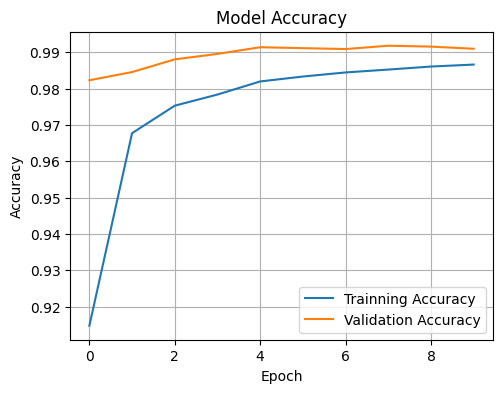

In [32]:
#Visualization
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Trainning Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

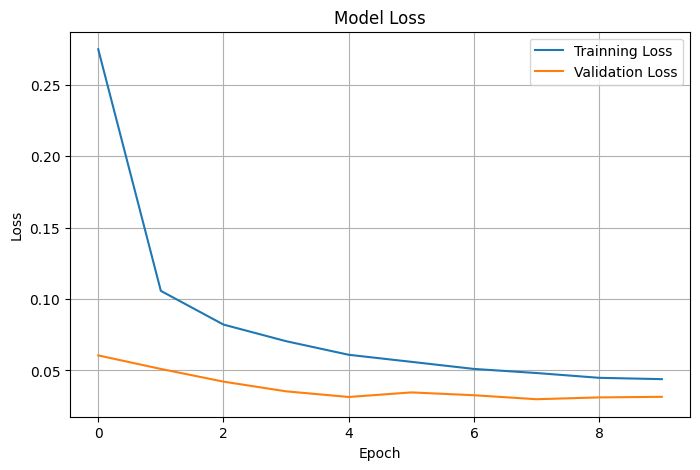

In [33]:
#Plot trainning
plt.figure(figsize=(8, 5))

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Trainning Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

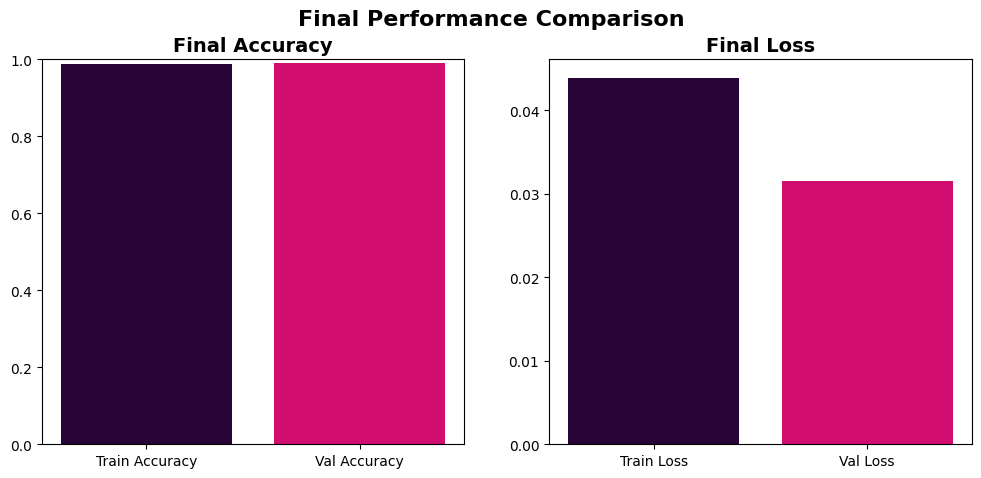

In [35]:
# Extract final accuracy and loss values
final_acc = [history.history['accuracy'][-1], history.history['val_accuracy'][-1]]
final_loss = [history.history['loss'][-1], history.history['val_loss'][-1]]

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Accuracy Bar Plot
ax[0].bar(['Train Accuracy', 'Val Accuracy'], final_acc, color=colors)
ax[0].set_title("Final Accuracy", fontsize=14, fontweight="bold")
ax[0].set_ylim(0, 1)

# Loss Bar Plot
ax[1].bar(['Train Loss', 'Val Loss'], final_loss, color=colors)
ax[1].set_title("Final Loss", fontsize=14, fontweight="bold")

plt.suptitle("Final Performance Comparison", fontsize=16, fontweight="bold")
plt.show()

Total Correctly Classified Images: 9910


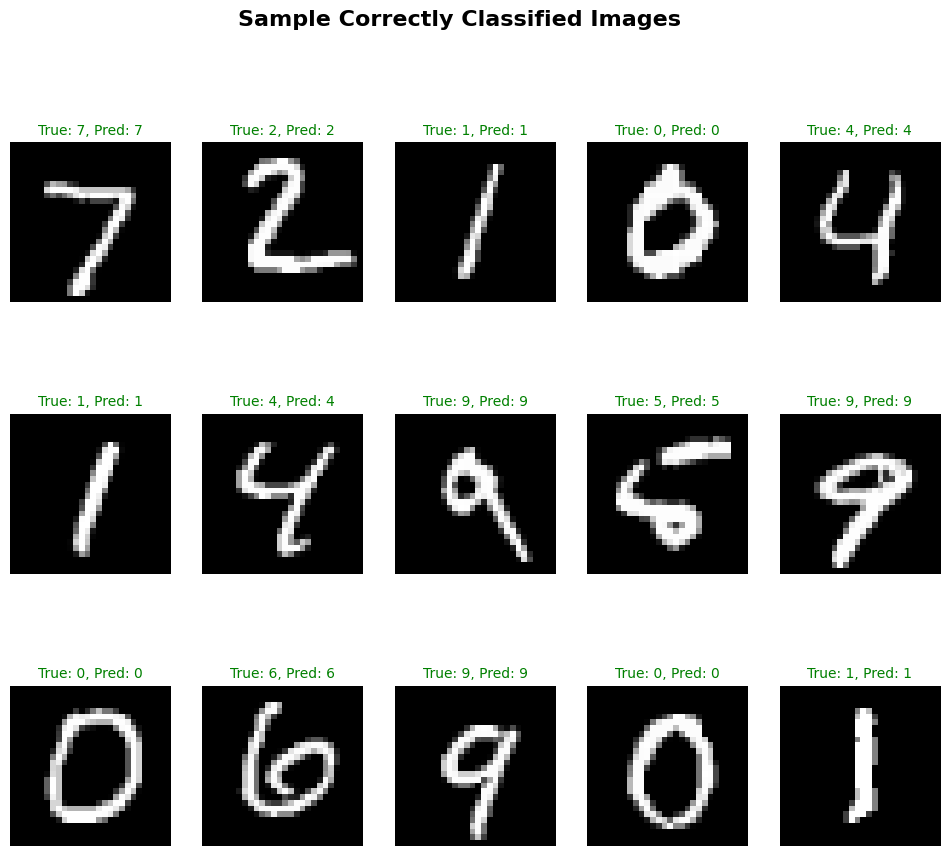

In [37]:
#Classified samples
correct_idx = np.where(y_pred == y_test)[0]

print(f"Total Correctly Classified Images: {len(correct_idx)}")

# Show first 15 correctly classified images
plt.figure(figsize=(12, 10))
for i, idx in enumerate(correct_idx[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}", fontsize=10, color='green')
    plt.axis('off')
plt.suptitle("Sample Correctly Classified Images", fontsize=16, fontweight="bold")
plt.show()

Total Misclassified Images: 90


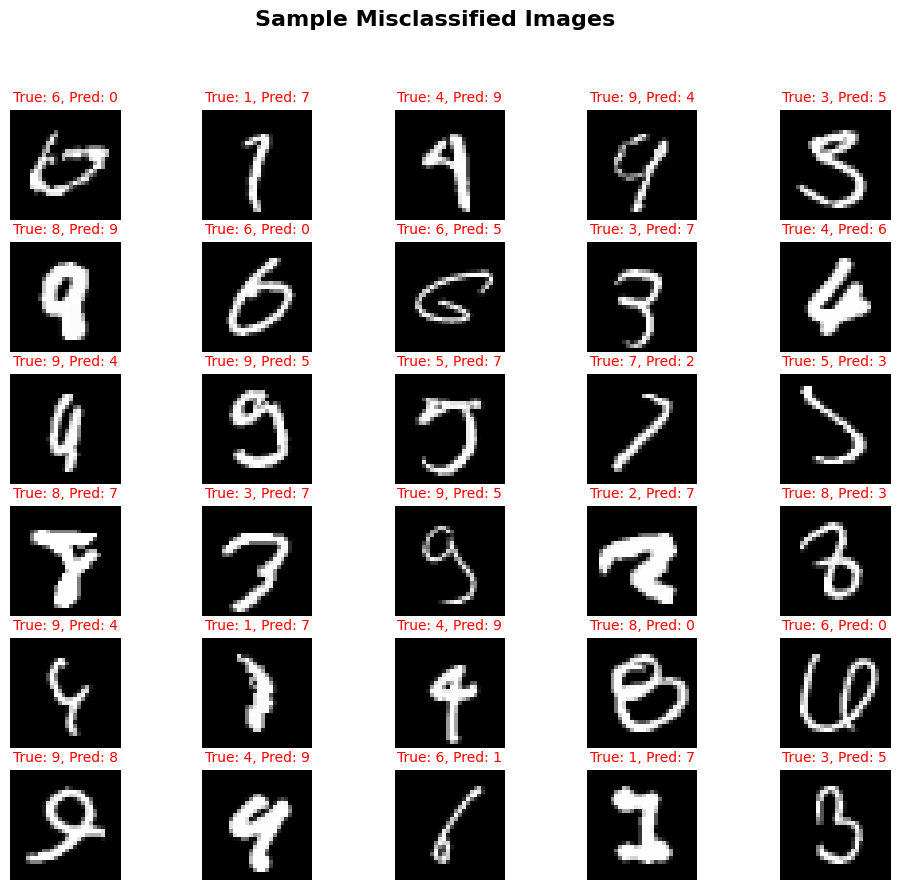

In [39]:
#Display misclassified images
misclassified_idx = np.where(y_pred != y_test)[0]

print(f"Total Misclassified Images: {len(misclassified_idx)}")
#Show first 30 misclassified images
plt.figure(figsize=(12, 10))
for i,idx in enumerate(misclassified_idx[:30]): #here :30 is from 0 to 30
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}", fontsize=10, color='red')
    plt.axis('off')
plt.suptitle("Sample Misclassified Images", fontsize=16, fontweight="bold")
plt.show()

In [41]:
#Save the trainned model
model.save('my_model.keras')
#
print('Model has been save')

Model has been save
